In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Label Encoding

In [4]:
from sklearn import preprocessing

In [5]:
label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
iris['Species'].unique()

array([0, 1, 2])

In [7]:
iris = iris.drop('Id', axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

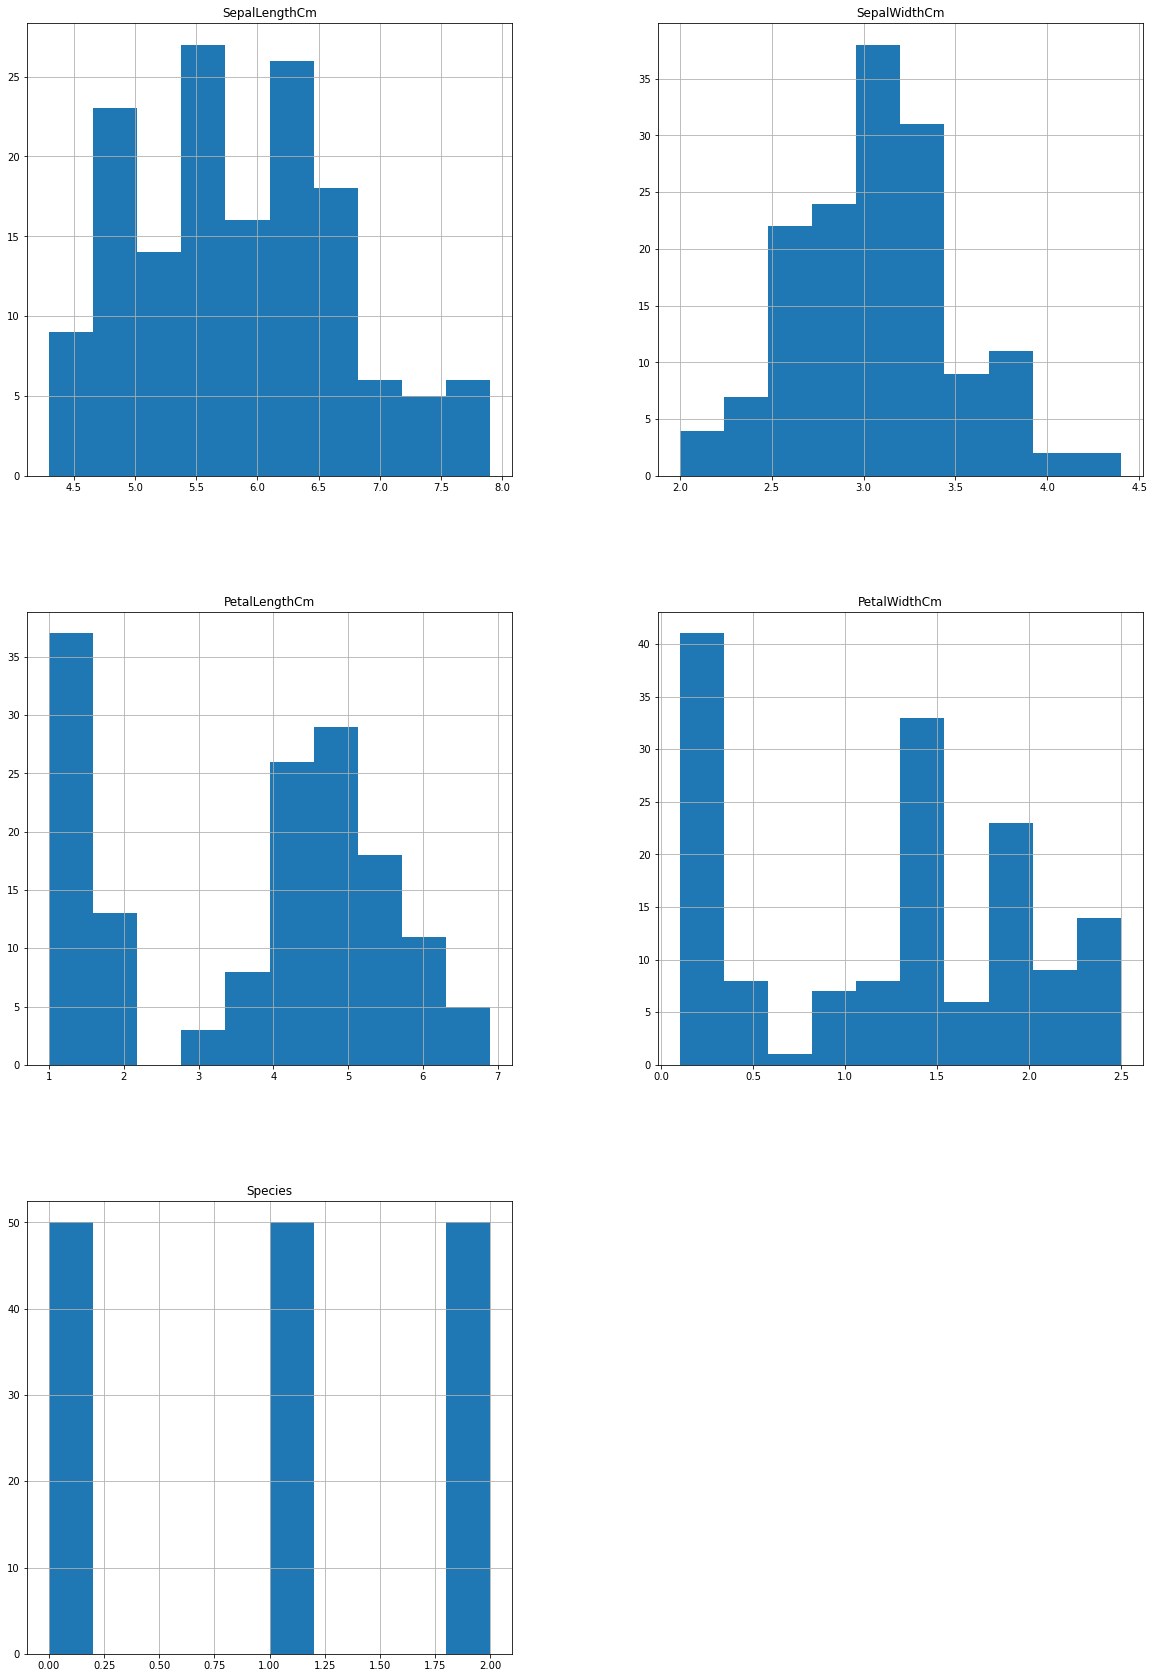

In [9]:
iris.hist(figsize=(20,30))

## Setting up the decision tree

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Modelling

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
drugtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predicting

In [16]:
predtree = drugtree.predict(X_test)

In [17]:
print(predtree[0:5])
print(y_test[0:5])

[0 0 2 0 0]
6      0
3      0
113    2
12     0
24     0
Name: Species, dtype: int32


## Evaluation

In [18]:
from sklearn import metrics
print('Decision tree accuracy :', metrics.accuracy_score(y_test, predtree))

Decision tree accuracy : 0.9555555555555556


## Visualization

In [19]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [20]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

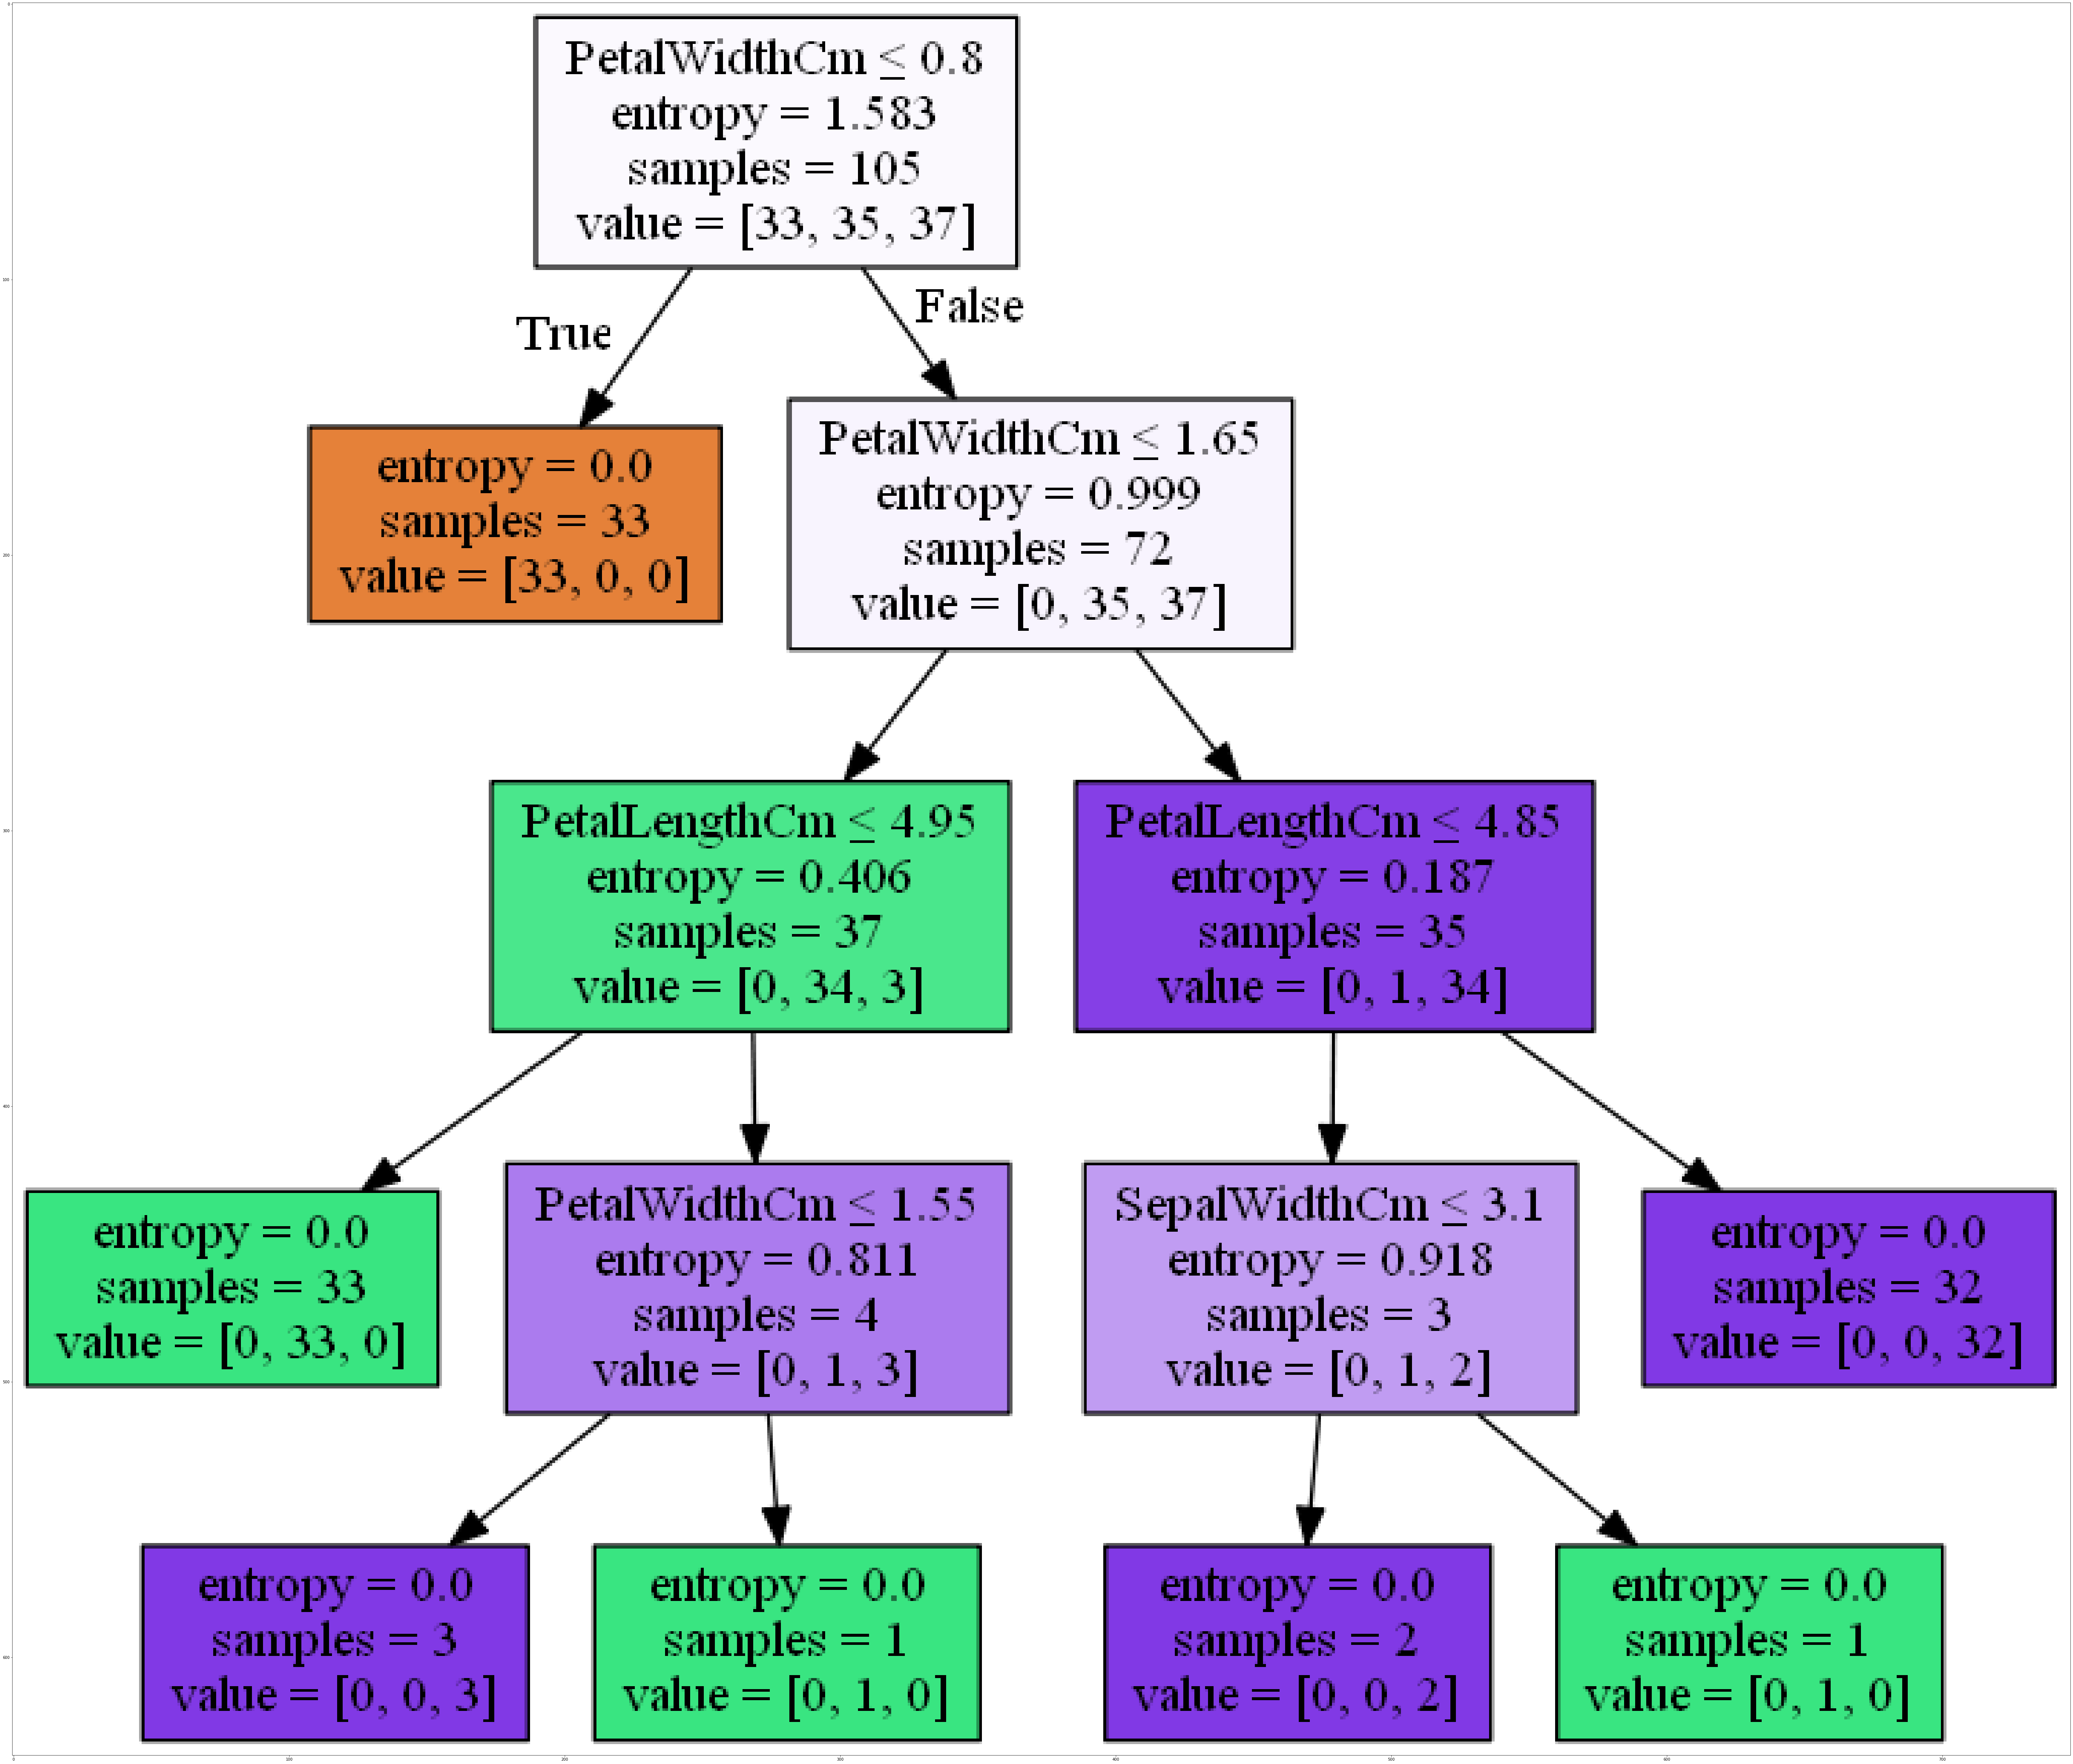

In [21]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = X.columns[0:5]
out=tree.export_graphviz(drugtree,feature_names=featureNames,out_file=dot_data,  filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')